In [160]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import json

with open('oed_credentials.json') as f:
    credentials = json.load(f)

app_id = credentials["app_id"]
app_key = credentials["app_key"]


# url = "https://od-api.oxforddictionaries.com/api/v2/<endpoint>/<language_code>/<word_id>"
#endpoint:
##‘entries’ = retrieve dictionary information about a word
##‘thesaurus’ = retrieve similar words
##‘sentences’ = retrieve example sentences for a word)


endpoint = "entries"
language_code = "en-gb"
word_id = "machine"


url = "https://oed-researcher-api.oxfordlanguages.com/oed/api/v0.2/words/?lemma=machine"
r = requests.get(url, headers = {"app_id": app_id, "app_key": app_key})
data = json.dumps(r.json())
word = json.loads(data)

word.keys()


#Senses: https://oed-researcher-api.oxfordlanguages.com/oed/api/v0.2/word/monitor_nn01/senses/

#['meta', 'links', 'data']

dict_keys(['meta', 'links', 'data'])

## Analysis

In [161]:
word['meta']

{'total': 2,
 'count': 2,
 'offset': 0,
 'limit': 100,
 'provider': 'Oxford University Press',
 'cite': 'Oxford English Dictionary API, Oxford University Press, 0.0.0.0/oed/api/v0.2/words/?lemma=machine&offset=0&limit=100 . Accessed 15 September 2020'}

In [162]:
word['links']

{'self': '/oed/api/v0.2/words/?lemma=machine&offset=0&limit=100',
 'prev': None,
 'next': None,
 'first': '/oed/api/v0.2/words/?lemma=machine&offset=0&limit=100',
 'last': '/oed/api/v0.2/words/?lemma=machine&offset=0&limit=100'}

# Definitions of "machine"

In [163]:
len(word['data'])
for item in word['data']:
    keys = ['id', 'band', 'meta', 'lemma', 'oed_url', 'daterange', 'etymology', 'first_use', 'frequency', 'sense_ids', 'definition', 'main_entry', 'inflections', 'frequency_id', 'oed_reference', 'pronunciations', 'parts_of_speech', 'primary_sense_id']
    for k in keys:
        if str(k) == 'id':
            print('############################')
            print(k ,': ', item[k])
            print('')
        else:    
            print(k ,': ', item[k])
            print('')


############################
id :  machine_vb01

band :  10

meta :  {'created': 1904, 'revised': True, 'updated': 2000}

lemma :  machine

oed_url :  https://www.oed.com/view/Entry/111851#eid38480197

daterange :  {'end': None, 'start': 1450, 'obsolete': False, 'rangestring': '?c1450—'}

etymology :  {'etymons': [{'word': 'machiner', 'language': 'French'}, {'word': 'machine', 'language': 'English', 'target_id': 'machine_nn01', 'part_of_speech': 'NN'}], 'etymology_type': 'borrowing', 'etymon_language': [['European languages', 'Italic', 'Romance', 'Italo-Western', 'Gallo-Romance', 'French'], ['English']], 'source_language': [['European languages', 'Italic', 'Romance', 'Italo-Western', 'Gallo-Romance', 'French'], ['European languages', 'Italic', 'Latin'], ['English']], 'etymology_summary': 'A borrowing from French.'}

first_use :  Life of St. Cuthbert

frequency :  [[1750, 0.071], [1760, 0.072], [1770, 0.076], [1780, 0.075], [1790, 0.078], [1800, 0.079], [1810, 0.079], [1820, 0.081], [18

# Frequency of each definition

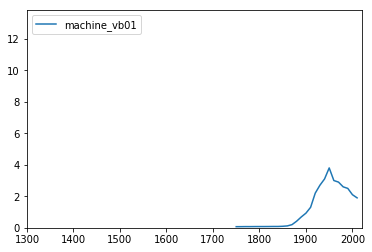

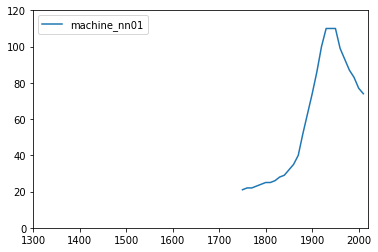

In [164]:
#not sure about how the frequency is calculated.. but this is a plot of the two definitions

frequency = {}
for i,w in enumerate(word['data']):
    frequency = dict(w['frequency'])
    x, y = zip(*frequency.items())
    plt.plot(x, y, label =w['id'])
    plt.xlim((1300,2020))
    plt.ylim((0, max(y) + 10))
    plt.legend(loc="upper left")
    plt.show() 

# Senses (sample = first word definition)

In [165]:
#let's take the senses of the first word id/definition (as a sample)

senses = word['data'][0].get('sense_ids')
print(senses)

['machine_vb01-38480199', 'machine_vb01-38480251', 'machine_vb01-38480267', 'machine_vb01-38480282', 'machine_vb01-38480402', 'machine_vb01-38480424', 'machine_vb01-38480453', 'machine_vb01-38480455']


In [166]:
senses_overview = pd.DataFrame()

url = "https://oed-researcher-api.oxfordlanguages.com/oed/api/v0.2/word/machine_nn01/senses/?offset=0&limit=10000"
r = requests.get(url, headers = {"app_id": app_id, "app_key": app_key})
data = json.dumps(r.json())
senses = json.loads(data)
for item in senses['data']:
    senses_overview = senses_overview.append(pd.io.json.json_normalize(item))
senses_overview
#senses_overview.to_csv('senses.csv')


,categories.region,categories.register,categories.topic,daterange.end,daterange.obsolete,daterange.rangestring,daterange.start,definition,first_use,id,...,meta.sense_group,meta.updated,notes,oed_reference,oed_url,part_of_speech,quotation_ids,semantic_class_ids,transitivity,word_id
0,[],[[rare]],[],None,False,1545—,1545,"A material or immaterial structure, esp. the f...",J. Schäfer,machine_nn01-38473945,...,machine_nn01-g01,2000,[],"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38473945,NN,"[machine_nn01-38473950, machine_nn01-38473961,...","[[1, 111290, 118635, 119024, 120162, 120172], ...",None,machine_nn01
0,[],[[historical]],"[[Military, Weaponry]]",None,False,1583—,1583,A military engine or siege-tower. Cf. war mach...,Brian Melbancke,machine_nn01-38474233,...,machine_nn01-g03,2000,[],"machine, n., sense II.3",https://www.oed.com/view/Entry/111850#eid38474233,NN,"[machine_nn01-38474243, machine_nn01-38474252,...","[[153072, 160439, 163207, 163208, 163377, 1633...",None,machine_nn01
0,[],[],[],1707,True,1595—1707,1595,spec. A scheme or plot. Obsolete.,Elizabeth I,machine_nn01-38474097,...,machine_nn01-g01,2000,[],"machine, n., sense I.1b",https://www.oed.com/view/Entry/111850#eid38474097,NN,"[machine_nn01-38474102, machine_nn01-38474122,...","[[1, 84689, 87987, 87988, 87989, 88083, 88109,...",None,machine_nn01
0,[],[],"[[Sciences, Medicine, Anatomy]]",None,False,1604—,1604,"A living body, esp. the human body considered ...",William Shakespeare,machine_nn01-38474140,...,machine_nn01-g02,2000,[],"machine, n., sense I.2",https://www.oed.com/view/Entry/111850#eid38474140,NN,"[machine_nn01-38474151, machine_nn01-38474160,...","[[1, 8835, 25507, 29189]]",None,machine_nn01
0,[],"[[historical], [poetic and literary]]","[[Arts, Performing Arts, Theatre]]",None,False,1609—,1609,Theatre. A (usually movable) contrivance for t...,Ben Jonson,machine_nn01-38474301,...,machine_nn01-g04,2000,[In early use predominantly a ‘flying’ car alo...,"machine, n., sense II.4a",https://www.oed.com/view/Entry/111850#eid38474301,NN,"[machine_nn01-38474320, machine_nn01-38474329,...","[[153072, 222360, 224508, 232933, 232967, 2330...",None,machine_nn01
0,[],[[colloquial and slang]],"[[Transport, Nautical]]",None,False,1637—,1637,A ship or other vessel. Now colloquial: a boat.,Thomas Heywood,machine_nn01-38474548,...,machine_nn01-g05,2000,[],"machine, n., sense III.5a",https://www.oed.com/view/Entry/111850#eid38474548,NN,"[machine_nn01-38474552, machine_nn01-38474562,...","[[153072, 198379, 202986, 204466, 206654]]",None,machine_nn01
0,"[[North America, Canada]]","[[archaic], [regional]]",[],None,False,1648—,1648,"In general use: an apparatus, device, instrume...",Moderate,machine_nn01-38475164,...,machine_nn01-g06,2000,[],"machine, n., sense IV.6a",https://www.oed.com/view/Entry/111850#eid38475164,NN,"[machine_nn01-208243324, machine_nn01-38475174...","[[1, 84689, 87987, 87988, 87989, 88083, 88109,...",None,machine_nn01
0,[],[],"[[Technology, Electrical], [Technology, Engine...",None,False,1659—,1659,"A complex device, consisting of a number of in...",T. St. Serfe,machine_nn01-38475286,...,machine_nn01-g06,2000,"[In 19th- and early 20th-cent. use, the word t...","machine, n., sense IV.6b",https://www.oed.com/view/Entry/111850#eid38475286,NN,"[machine_nn01-38475290, machine_nn01-38475300,...","[[153072, 208185, 211995, 213839, 214572]]",None,machine_nn01
0,[],[[rare]],[],None,False,1674—,1674,"In literature, etc.: a contrivance for the sak...",Thomas Rymer,machine_nn01-38474405,...,machine_nn01-g04,2000,[],"machine, n., sense II.4b",https://www.oed.com/view/Entry/111850#eid38474405,NN,"[machine_nn01-38474409, machine_nn01-38474419,...",[],None,machine_nn01
0,[],[],[],None,False,1676—,1676,figurative in general use.,Thomas Guidott,machine_nn01-38475994,...,machine_nn01-g08,2000,[],"machine, n., sense V.8a",https://www.oed.com/view/Entry/111850#eid38475994,NN,"[machine_nn01-38475998, machine_nn01-38476016,...",[],None,machine_nn01


# Quotations

In [171]:
senses = senses_overview['id']


In [172]:
quotations_overview = pd.DataFrame()
for s in senses:
    url = "https://oed-researcher-api.oxfordlanguages.com/oed/api/v0.2/sense/" + s + "/quotations/"
    r = requests.get(url, headers = {"app_id": app_id, "app_key": app_key})
    data = json.dumps(r.json())
    quotes = json.loads(data)
    for item in quotes['data']:
        quotations_overview = quotations_overview.append(pd.io.json.json_normalize(item))
quotations_overview

,datestring,first_in_sense,first_in_word,id,lemma,oed_reference,oed_url,sense_id,source.author,source.gender,source.title,text.full_text,text.keyword,text.keyword_offset,word_id,year
0,1545,True,True,machine_nn01-38473950,machine,"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38473950,machine_nn01-38473945,J. Schäfer,None,Early Mod. Eng. Lexicogr.,The hole machyne of this world is divided in ....,machyne,9,machine_nn01,1545
0,1545,False,False,machine_nn01-38473961,machine,"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38473961,machine_nn01-38473945,J. Schäfer,None,Early Mod. Eng. Lexicogr.,"Machine, hath many significacions, but here it...",Machine,0,machine_nn01,1545
0,c1550,False,False,machine_nn01-38473973,machine,"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38473973,machine_nn01-38473945,None,None,Complaynt Scotl.,The maist illustir potent prince of the maist ...,machine,81,machine_nn01,1550
0,1599,False,False,machine_nn01-38473981,machine,"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38473981,machine_nn01-38473945,A. Hume,male,Hymnes,"Be his wisedome,..sa wondrouslie of nocht, Thi...",machin,48,machine_nn01,1599
0,1673,False,False,machine_nn01-38473999,machine,"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38473999,machine_nn01-38473945,H. Hickman,male,Hist. Quinq-articularis,They that asserted Universal redemption by the...,Machine,83,machine_nn01,1673
0,1682,False,False,machine_nn01-38474007,machine,"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38474007,machine_nn01-38473945,N. O.,None,Lutrin,"Behind this Machine, cover'd as with a skreen,...",Machine,12,machine_nn01,1682
0,1753,False,False,machine_nn01-38474047,machine,"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38474047,machine_nn01-38473945,J. Hanway,male,Hist. Acct. Brit. Trade Caspian Sea,Her imperial majesty is drawn..in a large mach...,machine,42,machine_nn01,1753
0,1791,False,False,machine_nn01-38474058,machine,"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38474058,machine_nn01-38473945,C. Smith,female,Celestina,Her new laylock bonnet..for the safety of whic...,machine,106,machine_nn01,1791
0,a1806,False,False,machine_nn01-38474068,machine,"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38474068,machine_nn01-38473945,J. Barry,male,None,Had the whole of this great machine of the Fon...,machine,28,machine_nn01,1805
0,1829,False,False,machine_nn01-38474079,machine,"machine, n., sense I.1a",https://www.oed.com/view/Entry/111850#eid38474079,machine_nn01-38473945,R. Hall,male,Wks.,The mind casts its eye over the whole machine ...,machine,38,machine_nn01,1829


In [176]:
quotations_overview['text.full_text']

0    The hole machyne of this world is divided in ....
0    Machine, hath many significacions, but here it...
0    The maist illustir potent prince of the maist ...
0    Be his wisedome,..sa wondrouslie of nocht, Thi...
0    They that asserted Universal redemption by the...
0    Behind this Machine, cover'd as with a skreen,...
0    Her imperial majesty is drawn..in a large mach...
0    Her new laylock bonnet..for the safety of whic...
0    Had the whole of this great machine of the Fon...
0    The mind casts its eye over the whole machine ...
0    To each mortal peradventure earth becomes a ne...
0    For all that, their lucke was at that time, to...
0             Machine, an instrument or engine of War.
0    These are the goodly Machines..recommended to ...
0           He enormous machines round about the city.
0    The besieged made many vigorous sallies for th...
0    It was surrounded by massive walls and bastion...
0    In wordz..of such waight, as, in honest dimars...
0    As vs